In [1]:
import netCDF4
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_path = 'D:/EarthMantleConvection/mantle01/spherical001.nc'
netcdf = netCDF4.Dataset(file_path)

In [3]:
netcdf.variables.keys()

dict_keys(['lon', 'r', 'temperature', 'vx', 'vy', 'vz', 'thermal conductivity', 'thermal expansivity', 'temperature anomaly', 'spin transition-induced density anomaly', 'lat'])

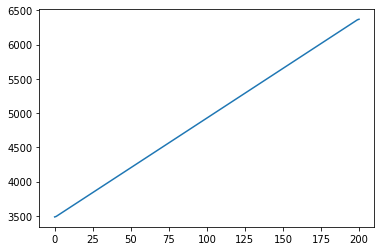

In [4]:
# R 3485km ~ 6371km
plt.plot(netcdf['r'][:])

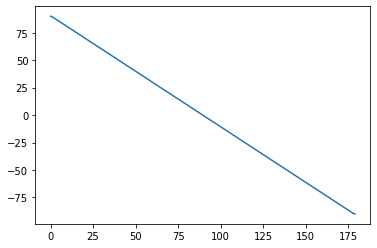

In [5]:
# 위도(height) 90 ~ -90
plt.plot(netcdf['lat'][:])

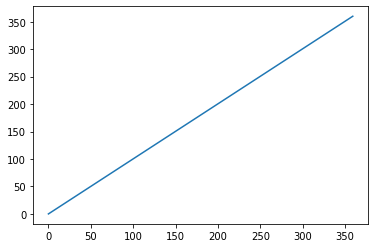

In [6]:
# 경도(width) 0 ~ 360
plt.plot(netcdf['lon'][:])

In [7]:
features = ['vx', 'vy', 'vz',
            'temperature', 'temperature anomaly',
            'thermal conductivity', 'thermal expansivity',
            'spin transition-induced density anomaly']

In [8]:
for f in features:
    d = netcdf[f][:]
    print(f"{f}, max: {np.max(d)}, min: {np.min(d)}, mean: {np.mean(d)}, std: {np.std(d)}")

vx, max: 5.700775851380513e-09, min: -3.9670631224453246e-09, mean: 4.742103845017942e-12, std: 3.9322783917938864e-10
vy, max: 5.8211400144614345e-09, min: -4.824658006441496e-09, mean: 1.2611255789662934e-11, std: 4.3129344540204784e-10
vz, max: 7.457672701605134e-09, min: -5.615409026660245e-09, mean: -1.7352695669270446e-11, std: 4.4529371856505406e-10
temperature, max: 3607.34375, min: 293.0, mean: 2209.614501953125, std: 296.6709289550781
temperature anomaly, max: 1105.453369140625, min: -1099.197509765625, mean: 1.8412749767303467, std: 82.32554626464844
thermal conductivity, max: 0.5701583027839661, min: -0.7660495042800903, mean: -0.0008825754630379379, std: 0.0500488243997097
thermal expansivity, max: 8.694364055372716e-07, min: -2.170390416722512e-06, mean: 1.4459429209523478e-09, std: 4.646121709583895e-08
spin transition-induced density anomaly, max: 130.17787170410156, min: -166.5840301513672, mean: 0.14792704582214355, std: 7.314555644989014


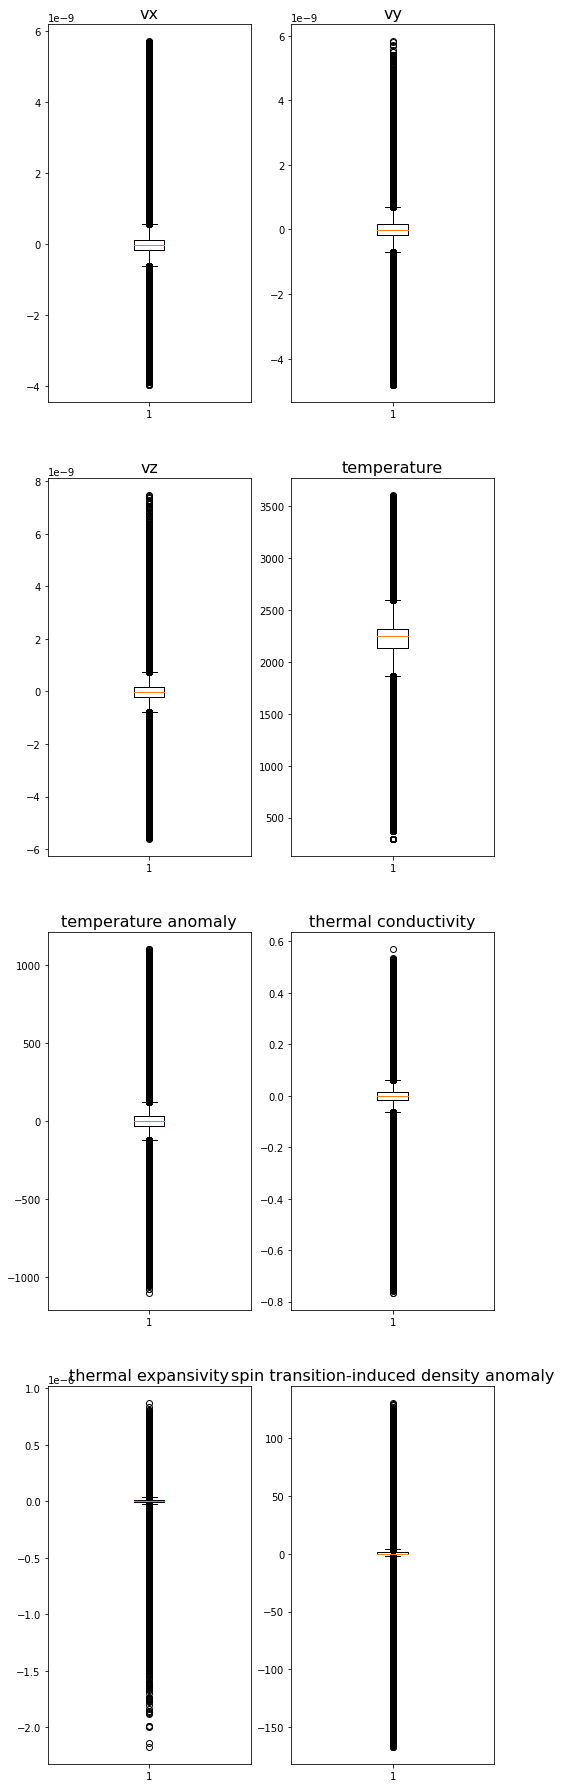

In [9]:
fig = plt.figure(figsize=(16, 32))

for i, f in enumerate(features):
    d = np.array(netcdf[f][:]).flatten()
    ax = fig.add_subplot(4, 2, i+1)
    ax.boxplot(d)
    ax.set_title(f, fontsize=16)
    
plt.show()

(13024800, 1)
(13024800,)
8.547396e-09 1.0000001 -10.100516 14.485324


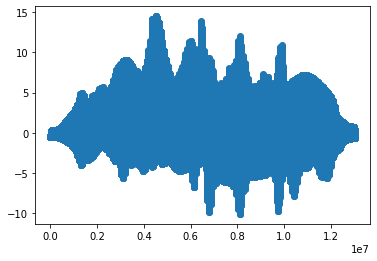

In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
d = netcdf['vx'][:]
x, y, z = d.shape
d = d.reshape((x*y*z, 1))
print(d.shape)
res = scaler.fit_transform(d).flatten()
print(res.shape)
plt.scatter(range(len(res)), res)
print(res.mean(), res.std(), res.min(), res.max())